In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from util import*

In [2]:
# Specify the path to download data
download_path = os.getcwd() + "/dataset/"
print(download_path)

/Users/zhenglyu/Desktop/Research/course/cme216/course_project/cme-216-housing-pricing-prediction/dataset/


In [3]:
ds = download_skl_dataset(download_path)

In [4]:
data, target, feature_names, DESCR = data_process(ds)

In [5]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=False)

In [6]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state=100)

In [11]:
rfReg = RandomForestRegressor(n_estimators=30)
rfReg = rfReg.fit(x_train, y_train)

In [12]:
y_val_pred = rfReg.predict(x_val)

In [13]:
y_pred = rfReg.predict(x_test)

In [14]:
mse = np.mean(((y_pred - y_test)**2))
print(mse)

0.2644470355626009


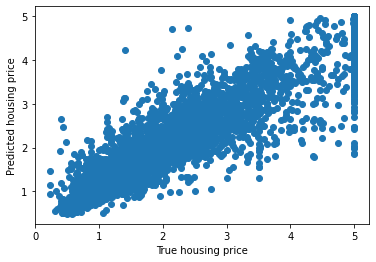

In [15]:
plot_pred_true(x_test, y_test, y_pred)

In [16]:
cur_path = os.getcwd()

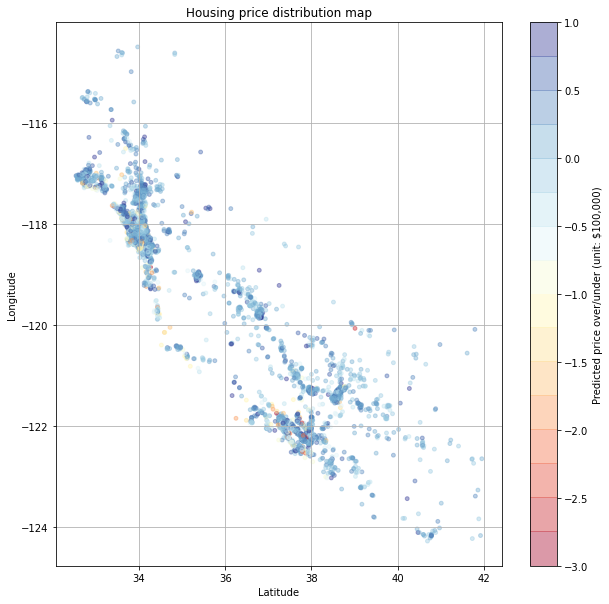

In [17]:
# Plot land map
save_path = cur_path + '/figures/random_tree_train_mse_test_mse'
land_map(x_test*std_data + mean_data, y_pred - y_test, save_path = save_path, bar_label='Predicted price over/under (unit: $100,000)', clim=[-3, 1], step=16)

In [18]:
tmp = np.mean(np.abs((y_pred.T - y_test)/y_test*100))
print(tmp)

19.27708621850731
